In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def initialize_parameters(num_features):
    w = np.random.randn(num_features)
    b = np.random.randn()
    return w, b

In [2]:
def cal_gradient_lasso(X, pred_value, actual_value, w, lambda_l1):
    error = pred_value - actual_value
    
    if X.ndim == 1:
        X = X.reshape(1, -1)

    dw = 2 * np.mean(X * error, axis=0) + lambda_l1 * np.sign(w)
    db = 2 * np.mean(error)
    
    return dw, db

In [3]:
def cal_gradient_ridge(X, pred_value, actual_value, w, lambda_l1):
    error = pred_value - actual_value
    
    X = np.array(X)
    w = np.array(w) 
    
    if X.ndim == 1:
        X = X.reshape(1, -1)

    if w.ndim == 1 and w.shape[0] != X.shape[1]:
        w = w.reshape(-1, 1)

    # Gradient calculation
    dw = 2 * np.mean(X * error, axis=0) + 2 * lambda_l1 * w
    db = 2 * np.mean(error)
    
    return dw, db

In [4]:
def stochastic_gradient_descent(X_train, y_train, X_valid, y_valid, w, b, learning_rate, num_iterations, lambda_l1, param):

    for i in range(0, num_iterations):
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        for j in range(len(X_train)):
            X_sample = X_train_shuffled[j, :].reshape(1, -1)
            y_sample = y_train_shuffled[j]

            pred_value = np.dot(X_sample, w) + b

            if(param == 1):
                dw, db = cal_gradient_lasso(X_sample, pred_value, y_sample, w, lambda_l1)
            
            elif(param == 2):
                dw, db = cal_gradient_ridge(X_sample, pred_value, y_sample, w, lambda_l1)

            w -= learning_rate*dw
            b -= learning_rate*db

    return w, b

In [5]:
def perform_calc(param):
    X_train = pd.read_csv("X_train.csv").values 
    y_train = pd.read_csv("y_train.csv").values
    X_valid = pd.read_csv("X_valid.csv").values
    y_valid = pd.read_csv("y_valid.csv").values
    X_test = pd.read_csv("X_test.csv").values
    y_test = pd.read_csv("y_test.csv").values.flatten()

    num_features = X_train.shape[1]

    learning_rate = 0.05
    num_iterations = 1000
    lambda_l1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

    MSE_test_List = []
    for i in lambda_l1 :
        w = [0] * 7
        b = 0
        w, b = stochastic_gradient_descent(X_train, y_train, X_valid, y_valid, w, b, learning_rate, num_iterations, i, param)
        pred_value_test = np.dot(X_test, w) + b
        MSE_test = np.mean(( pred_value_test - y_test) ** 2)
        print(f"MSE for test_set is {MSE_test}")
        print(f"weights for lambda value {i}: {w}")
        R2_denom = np.mean((y_test - np.mean(y_test)) ** 2)

        print(f"The value of R2 is {1 - (MSE_test / R2_denom)}")
        MSE_test_List.append(MSE_test)

    plt.figure(figsize=(8, 6))
    plt.plot(MSE_test_List, label="MSE_Test")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss over Iterations during Gradient Descent")
    plt.legend()
    plt.grid(True)
    plt.show()

MSE for test_set is 143.71855012688877
weights for lambda value 0.1: [14.55075768  3.3536558  -0.80228981 -1.42940842 -1.777241   10.21868207
 -0.13230341]
The value of R2 is 0.6538583904135034
MSE for test_set is 188.05744943742525
weights for lambda value 0.2: [22.59800897  1.53530114  6.85091804 -0.17097456  3.59445533  4.28132617
 -2.09369991]
The value of R2 is 0.5470695454029435
MSE for test_set is 168.59939099548996
weights for lambda value 0.3: [16.6812295   3.94982994 -0.10466108 -2.09190156 -4.33195943 11.47974698
  1.386205  ]
The value of R2 is 0.5939336674148414
MSE for test_set is 110.88140204336118
weights for lambda value 0.4: [18.50669886  1.68035759 -3.54438817  2.43226226 -1.47798162  9.74678536
 -1.59499763]
The value of R2 is 0.7329456291994993
MSE for test_set is 96.6118305430503
weights for lambda value 0.5: [16.4048266   5.01615308 -2.20120138  4.61691304  0.50318974  5.33874442
 -1.43698763]
The value of R2 is 0.7673134435342969
MSE for test_set is 119.66450885

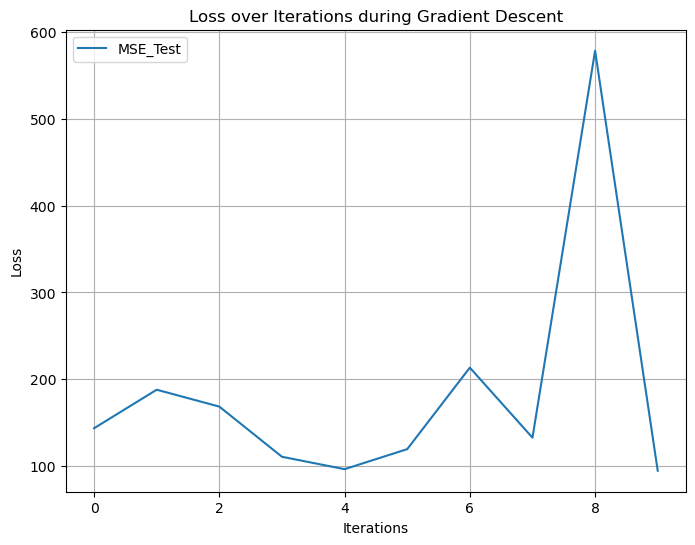

In [6]:
perform_calc(1)

MSE for test_set is 115.06055236259607
weights for lambda value 0.1: [14.60173992  1.41735241 -1.38773193  1.06555917 -1.06442594  9.0522182
 -3.56845305]
The value of R2 is 0.7228802770447029
MSE for test_set is 104.07495809489254
weights for lambda value 0.2: [17.23193407  4.88194318  1.31679022  3.00099571 -1.42286502  6.27966839
  0.42666479]
The value of R2 is 0.7493387354603341
MSE for test_set is 250.52968910690942
weights for lambda value 0.3: [22.39672247 -0.6420813  -3.37793241  6.68432967 -3.42457744 10.39013955
  0.36229145]
The value of R2 is 0.396607120235304
MSE for test_set is 135.26537687359695
weights for lambda value 0.4: [11.28013709  2.75948225 -1.65263242 -0.2641551  -2.17610824  8.30783155
 -3.80667547]
The value of R2 is 0.6742175924331772
MSE for test_set is 222.22984253114694
weights for lambda value 0.5: [20.03016199 -5.18093131 -0.91087263 -1.5087277   3.89446679 10.54711002
 -4.11345025]
The value of R2 is 0.46476641098891014
MSE for test_set is 181.4777095

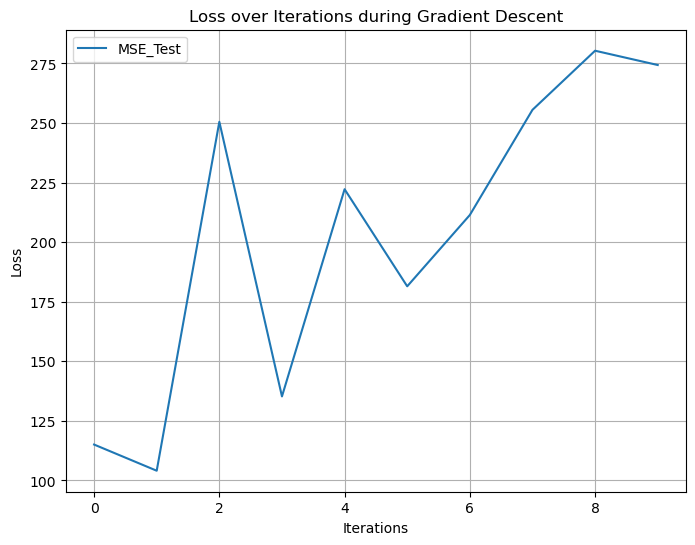

In [7]:
perform_calc(2)

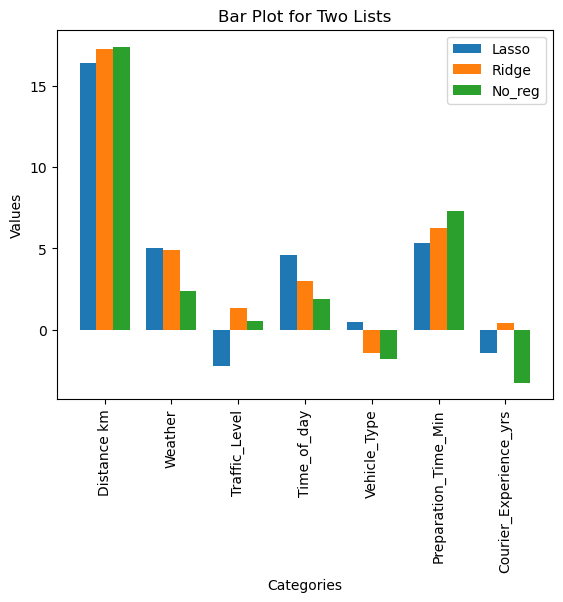

In [10]:
Lasso = [16.4048266, 5.01615308, -2.20120138, 4.61691304, 0.50318974, 5.33874442, -1.43698763]
Ridge = [17.23193407, 4.88194318, 1.31679022,  3.00099571, -1.42286502, 6.27966839, 0.42666479]
No_reg = [17.39277965,  2.38565199,  0.51565962,  1.86884632, -1.77953728,  7.2870593, -3.23317028]


import matplotlib.pyplot as plt
import numpy as np

labels = ['Distance km', 'Weather', 'Traffic_Level', 'Time_of_day', 'Vehicle_Type', 'Preparation_Time_Min', 'Courier_Experience_yrs']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

ax.bar(x - width, Lasso, width, label='Lasso')
ax.bar(x, Ridge, width, label='Ridge')
ax.bar(x + width, No_reg, width, label='No_reg')

ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Plot for Two Lists')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()
